# Name: Purvita Mandal

# #GRIPFEB21

# The Sparks Foundation

# Data Science and Business Analytics internship

Task :Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.As a business manager, try to find out the weak areas where you can
work to make more profit.What all business problems you can derive by exploring the data?

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing data
data=pd.read_csv("SampleSuperstore.csv")

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
data.shape

(9994, 13)

There are 9994 entries and 13 features

In [7]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


We do not need postal codes for our analysis so we drop it here.

In [9]:
data1=data.drop('Postal Code',axis=1)

In [ ]:
Let us look at the different unique values of categorical variables present.

In [10]:
data1.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [12]:
data1['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [11]:
data1['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [12]:
data1['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [16]:
data1['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [13]:
data1['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [14]:
data1['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

# Let us Check the presence of missing values.

In [15]:
data1.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<AxesSubplot:>

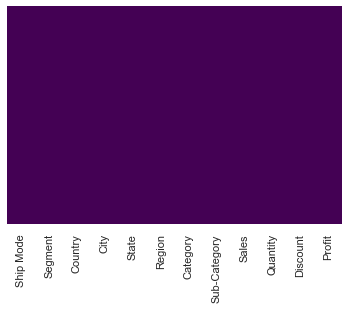

In [16]:
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We are confirmed that there is no missing values in the dataset!

In [17]:
# Let us first visualize the original data.

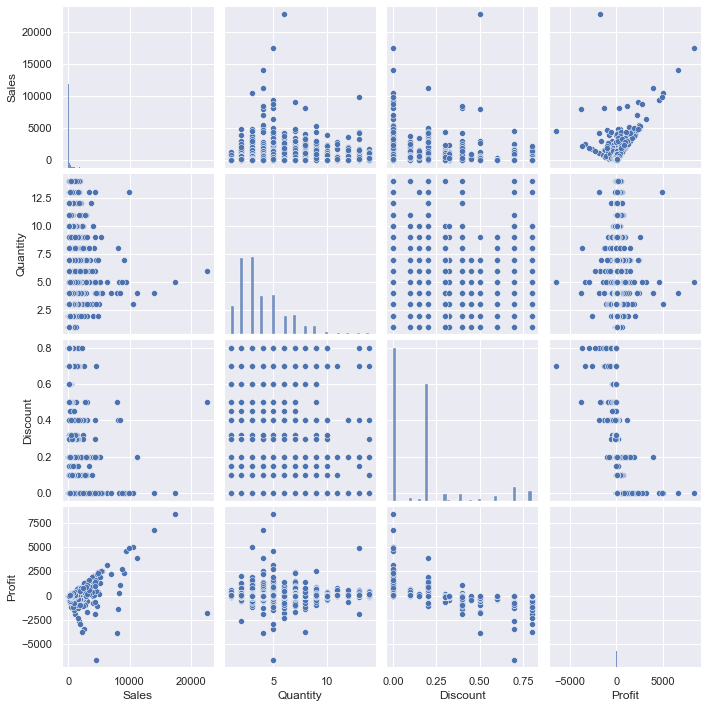

In [18]:
sns.pairplot(data1)

# Check the presence of outliers 

<AxesSubplot:xlabel='Profit'>

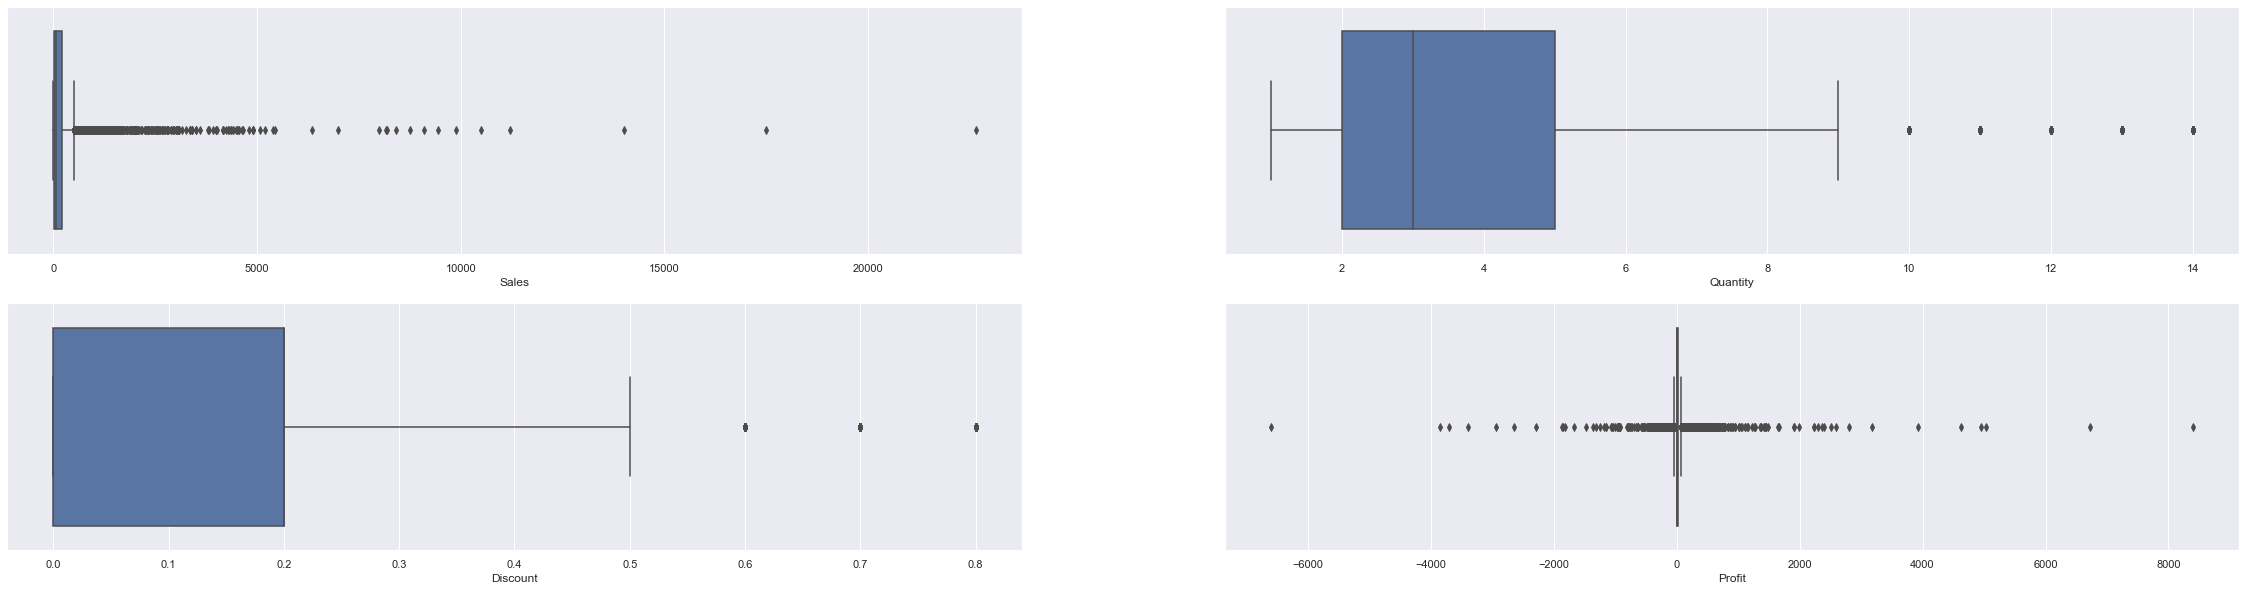

In [19]:
plt.figure(figsize=(40,10))
plt.subplot(2,2,1)
sns.boxplot(x=data1['Sales'])
plt.subplot(2,2,2)
sns.boxplot(x=data1['Quantity'])
plt.subplot(2,2,3)
sns.boxplot(x=data1['Discount'])
plt.subplot(2,2,4)
sns.boxplot(x=data1['Profit'])

Outliers are present in Sales,Quantity and Profit. So we need to tackle them.

We will replace the outliers using IQR method.

In [20]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
    

In [21]:
low,upp=remove_outlier(data1['Sales'])
data1['Sales']=np.where(data1['Sales']>upp,upp,data1['Sales'])
data1['Sales']=np.where(data1['Sales']<low,low,data1['Sales'])

In [22]:
low,upp=remove_outlier(data1['Quantity'])
data1['Quantity']=np.where(data1['Quantity']>upp,upp,data1['Quantity'])
data1['Quantity']=np.where(data1['Quantity']<low,low,data1['Quantity'])

In [23]:
low,upp=remove_outlier(data1['Discount'])
data1['Discount']=np.where(data1['Discount']>upp,upp,data1['Discount'])
data1['Discount']=np.where(data1['Discount']<low,low,data1['Discount'])

In [24]:
low,upp=remove_outlier(data1['Profit'])
data1['Profit']=np.where(data1['Profit']>upp,upp,data1['Profit'])
data1['Profit']=np.where(data1['Profit']<low,low,data1['Profit'])

<AxesSubplot:xlabel='Profit'>

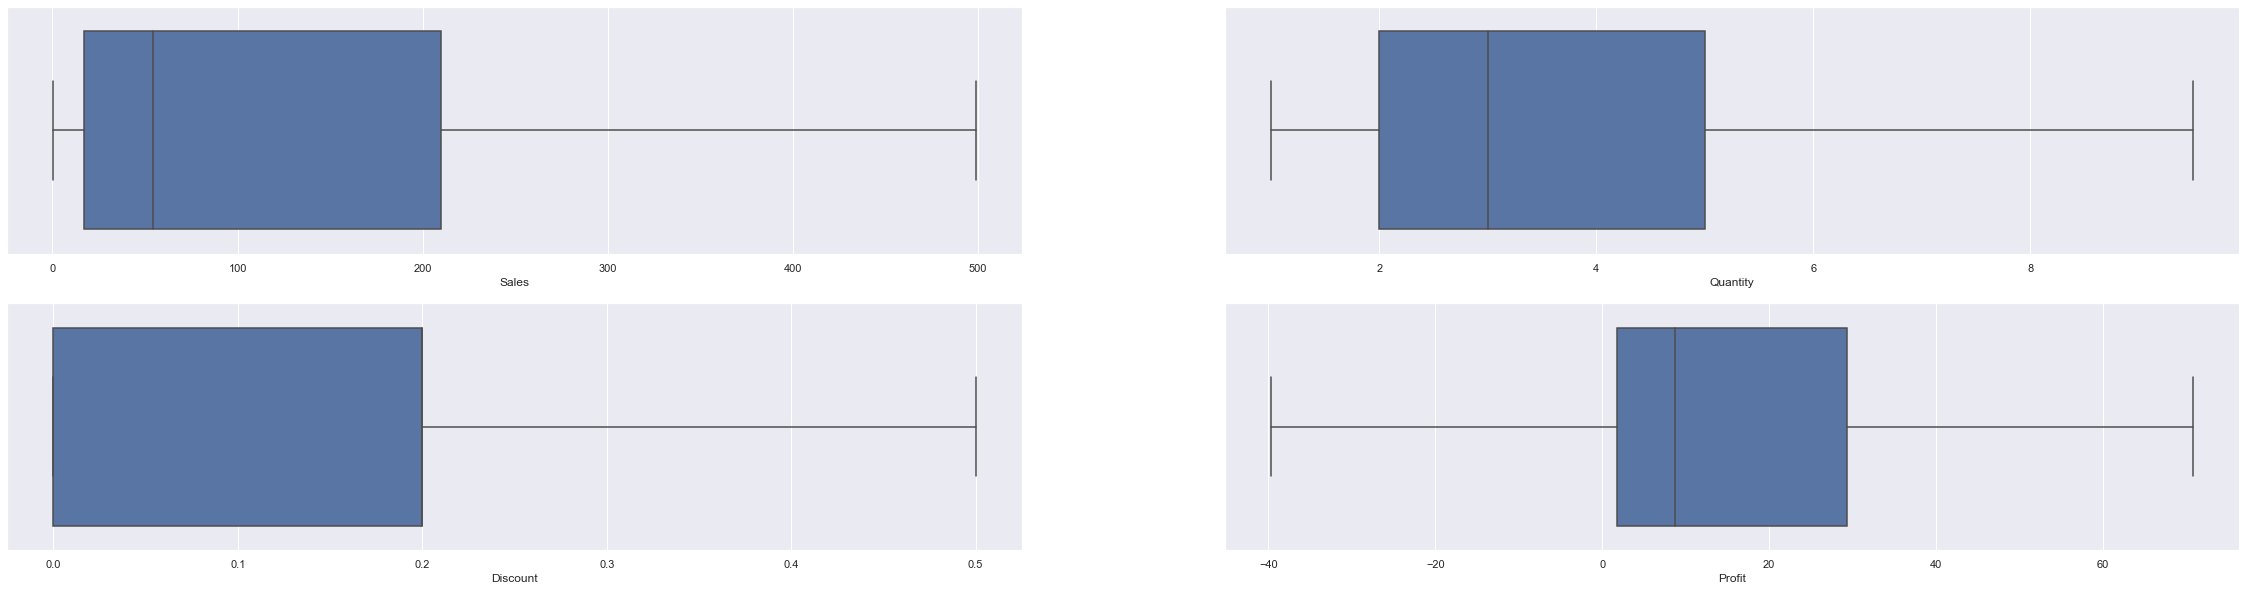

In [25]:
plt.figure(figsize=(40,10))
plt.subplot(2,2,1)
sns.boxplot(x=data1['Sales'])
plt.subplot(2,2,2)
sns.boxplot(x=data1['Quantity'])
plt.subplot(2,2,3)
sns.boxplot(x=data1['Discount'])
plt.subplot(2,2,4)
sns.boxplot(x=data1['Profit'])

Outliers have been removed .

# Checking Duplicacy 

In [26]:
duplicate=data1.duplicated()
print(duplicate.sum())


72


There are 73 duplicate entries!!

In [27]:
data1[duplicate]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,East,Office Supplies,Paper,15.552,3.0,0.2,5.443200
1019,Standard Class,Corporate,United States,New York City,New York,East,Office Supplies,Storage,498.930,5.0,0.0,70.816875
1878,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,302.376,3.0,0.2,22.678200
2979,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Office Supplies,Paper,20.736,4.0,0.2,7.257600
3033,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,East,Office Supplies,Paper,20.736,4.0,0.2,7.257600
...,...,...,...,...,...,...,...,...,...,...,...,...
9477,Second Class,Corporate,United States,Chicago,Illinois,Central,Office Supplies,Binders,3.564,3.0,0.5,-6.237000
9658,Standard Class,Consumer,United States,New York City,New York,East,Furniture,Chairs,498.930,4.0,0.1,70.816875
9673,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,East,Technology,Phones,498.930,5.0,0.4,-39.724125
9748,Standard Class,Consumer,United States,Chicago,Illinois,Central,Furniture,Chairs,498.930,4.0,0.3,-39.724125


In [28]:
data1.drop_duplicates(inplace=True)

In [29]:
duplicate1=data1.duplicated()
print(duplicate1.sum())

0


Duplicates have been removed.

# Relationship Analysis

<AxesSubplot:>

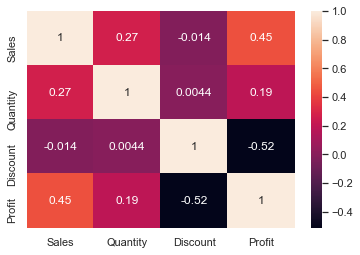

In [30]:
correlation=data1.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

Here we see negative correlation between pairs :(Sales, Discount),(Profit,Discount).

The data after removing duplicates and outlier.

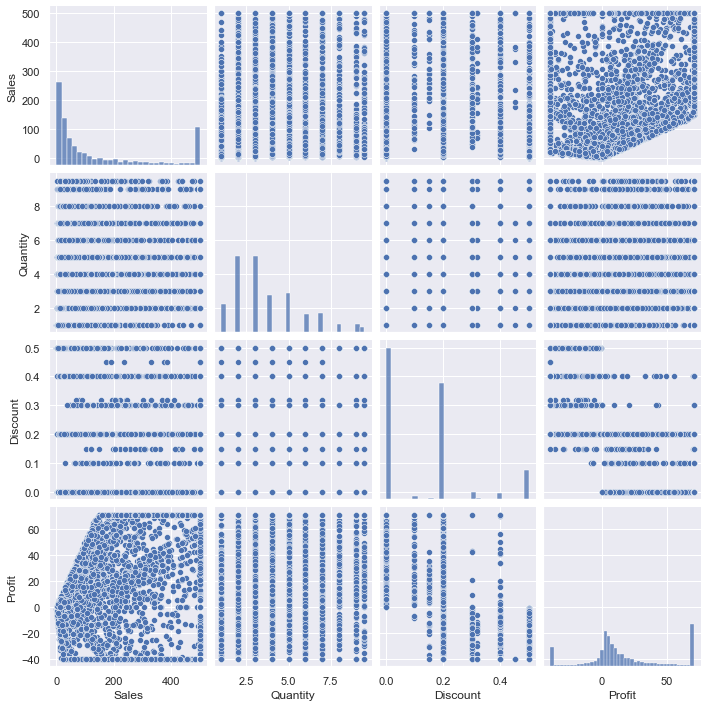

In [31]:
sns.pairplot(data1)

# Let's look deeper into Ship Mode

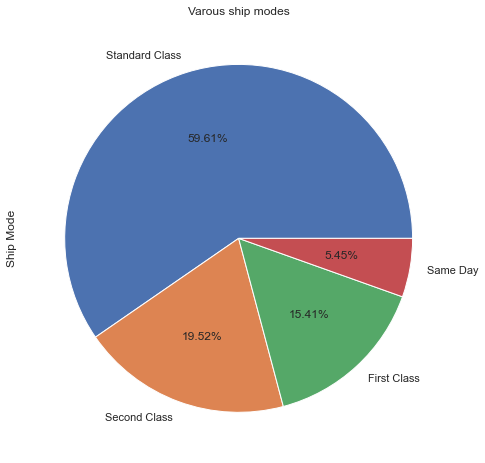

In [33]:
plt.figure(figsize=(10,8))
data1['Ship Mode'].value_counts().plot.pie(autopct="%.2f%%")
plt.title("Varous ship modes")
plt.show()

The Standard class ship mode is most preferred. Customers do not prefer same day ship mode.

In [34]:
data1.groupby(["Ship Mode","Segment"])['Segment'].count()

Ship Mode       Segment    
First Class     Consumer        763
                Corporate       482
                Home Office     284
Same Day        Consumer        317
                Corporate       113
                Home Office     111
Second Class    Consumer       1014
                Corporate       608
                Home Office     315
Standard Class  Consumer       3053
                Corporate      1799
                Home Office    1063
Name: Segment, dtype: int64

Text(0.5, 1.0, 'Shipping Modes distributed over Segments')

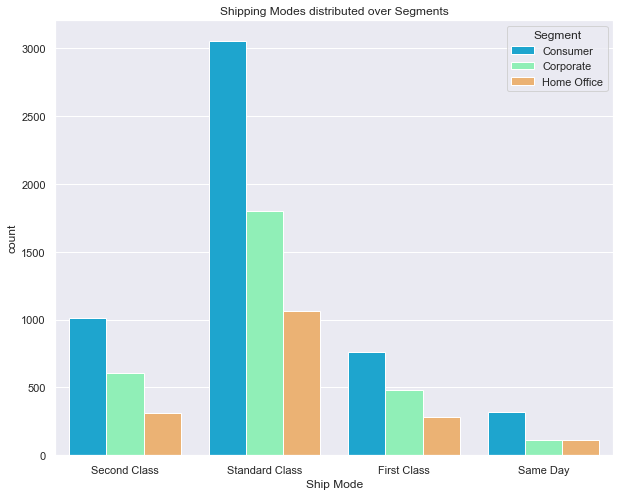

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(x='Ship Mode',hue='Segment',data=data1,palette='rainbow')
plt.title("Shipping Modes distributed over Segments")

Consumers prefer Standard Class Ship mode the most.

In [36]:
data1.groupby(["Ship Mode","Region"])['Region'].count()

Ship Mode       Region 
First Class     Central     298
                East        487
                South       234
                West        510
Same Day        Central     120
                East        154
                South        83
                West        184
Second Class    Central     464
                East        527
                South       329
                West        617
Standard Class  Central    1432
                East       1647
                South       974
                West       1862
Name: Region, dtype: int64

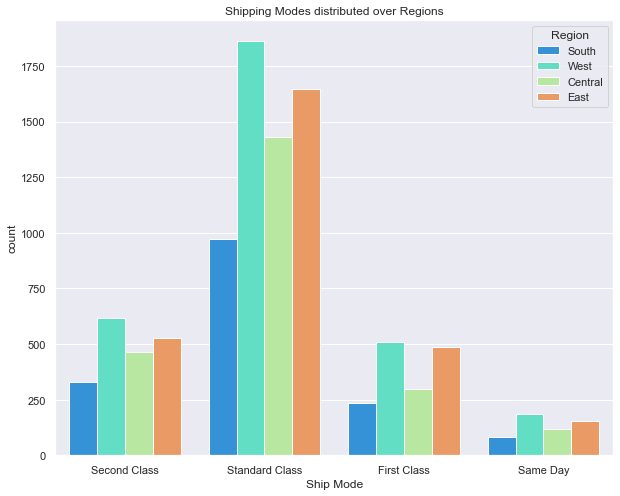

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(x='Ship Mode',hue='Region',data=data1,palette='rainbow')
plt.title("Shipping Modes distributed over Regions")
plt.show()

Customers from West prefer Standard class the most. 

In [39]:
data1.groupby(["Ship Mode","Category"])['Category'].count()

Ship Mode       Category       
First Class     Furniture           327
                Office Supplies     903
                Technology          299
Same Day        Furniture           119
                Office Supplies     325
                Technology           97
Second Class    Furniture           425
                Office Supplies    1147
                Technology          365
Standard Class  Furniture          1236
                Office Supplies    3608
                Technology         1071
Name: Category, dtype: int64

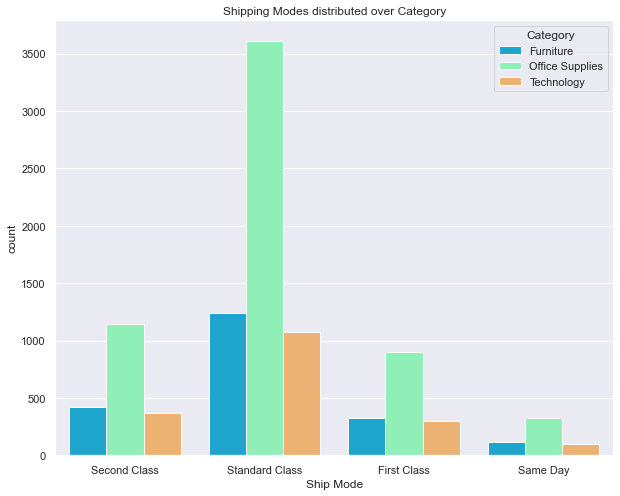

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(x='Ship Mode',hue='Category',data=data1,palette='rainbow')
plt.title("Shipping Modes distributed over Category")
plt.show()

In [42]:
data1.groupby(["Ship Mode","Sub-Category"])['Sub-Category'].count()

Ship Mode       Sub-Category
First Class     Accessories     128
                Appliances       76
                Art             112
                Binders         237
                Bookcases        49
                               ... 
Standard Class  Paper           762
                Phones          529
                Storage         502
                Supplies        111
                Tables          189
Name: Sub-Category, Length: 68, dtype: int64

Text(0.5, 1.0, 'Shipping Modes distributed over Sub-Category')

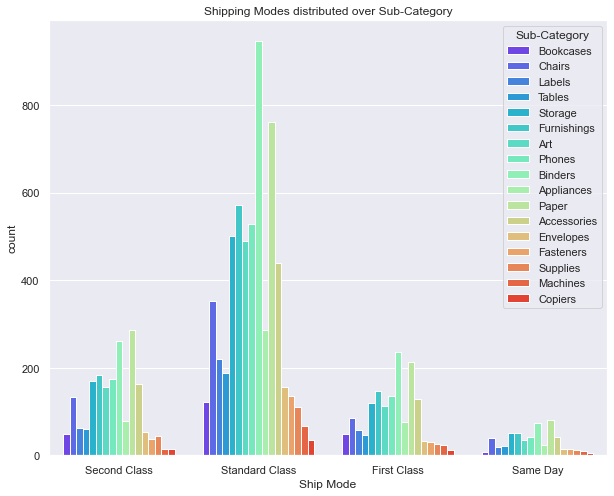

In [68]:
plt.figure(figsize=(10,8))
sns.countplot(x='Ship Mode',hue='Sub-Category',data=data1,palette='rainbow')
plt.title("Shipping Modes distributed over Sub-Category")

# Segment 

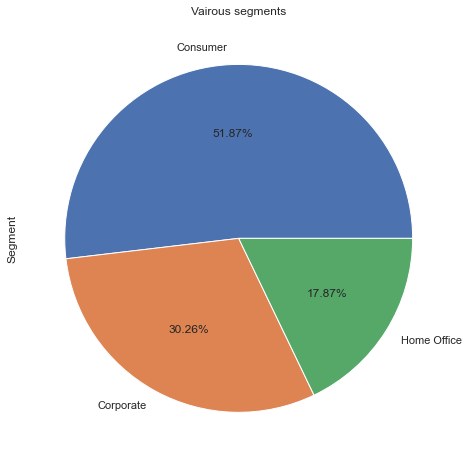

In [43]:
plt.figure(figsize=(10,8))
data1['Segment'].value_counts().plot.pie(autopct="%.2f%%")
plt.title("Vairous segments")
plt.show()

In [44]:
data1.groupby(["Segment","Region"])['Region'].count()

Segment      Region 
Consumer     Central    1206
             East       1448
             South       838
             West       1655
Corporate    Central     670
             East        870
             South       510
             West        952
Home Office  Central     438
             East        497
             South       272
             West        566
Name: Region, dtype: int64

Text(0.5, 1.0, 'Segment distributed over Regions')

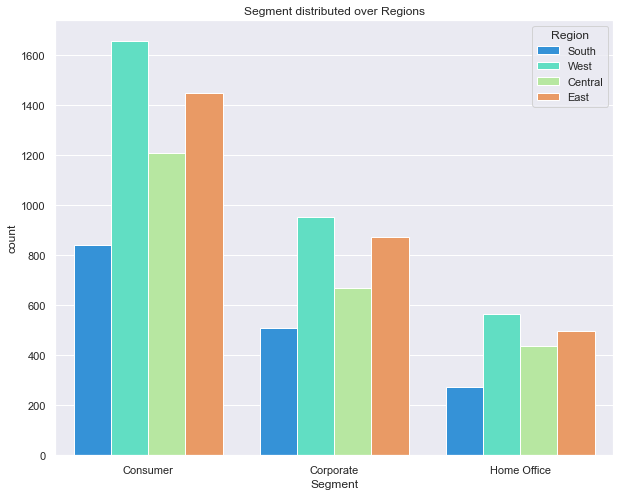

In [79]:
plt.figure(figsize=(10,8))
sns.countplot(x='Segment',hue='Region',data=data1,palette='rainbow')
plt.title("Segment distributed over Regions")

In [45]:
data1.groupby(["Segment","Category"])['Category'].count()

Segment      Category       
Consumer     Furniture          1104
             Office Supplies    3102
             Technology          941
Corporate    Furniture           644
             Office Supplies    1807
             Technology          551
Home Office  Furniture           359
             Office Supplies    1074
             Technology          340
Name: Category, dtype: int64

Text(0.5, 1.0, 'Segment distributed over Categories')

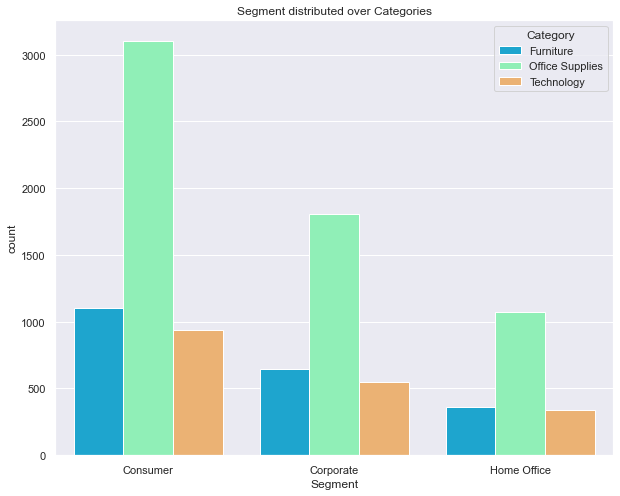

In [74]:
plt.figure(figsize=(10,8))
sns.countplot(x='Segment',hue='Category',data=data1,palette='rainbow')
plt.title("Segment distributed over Categories")

In [80]:
data1.groupby(["Segment","Sub-Category"])['Sub-Category'].count()

Segment      Sub-Category
Consumer     Accessories     405
             Appliances      244
             Art             427
             Binders         777
             Bookcases       129
             Chairs          324
             Copiers          34
             Envelopes       129
             Fasteners       114
             Furnishings     493
             Labels          188
             Machines         57
             Paper           675
             Phones          445
             Storage         448
             Supplies        100
             Tables          158
Corporate    Accessories     226
             Appliances      154
             Art             217
             Binders         471
             Bookcases        64
             Chairs          187
             Copiers          20
             Envelopes        84
             Fasteners        59
             Furnishings     287
             Labels           99
             Machines         34
             Pape

Text(0.5, 1.0, 'Segment distributed over Sub-Category')

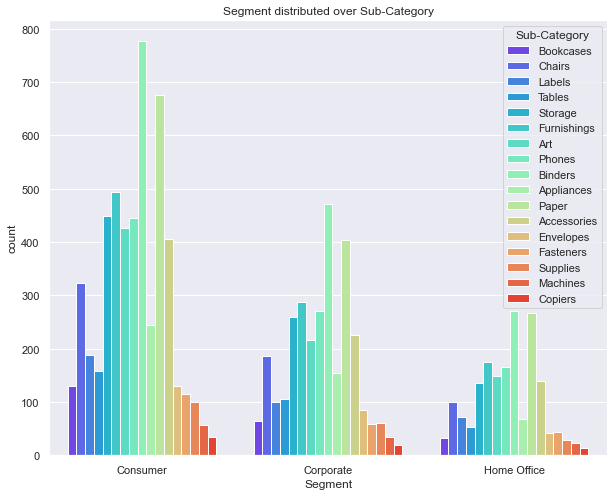

In [81]:
plt.figure(figsize=(10,8))
sns.countplot(x='Segment',hue='Sub-Category',data=data1,palette='rainbow')
plt.title("Segment distributed over Sub-Category")

# Region

Text(0.5, 1.0, 'Sales in different regions')

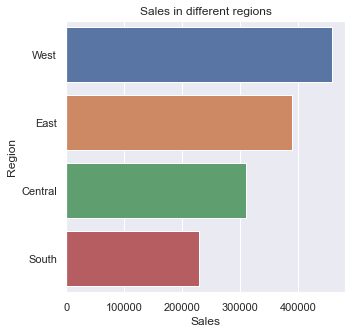

In [120]:
plt.figure(figsize=(5,5))
state=data1.groupby('Region').sum()
ss=state.sort_values(by=('Sales'),ascending=False)
sns.barplot(x='Sales',y=ss.index,data=ss)
plt.title("Sales in different regions")

Sales is maximum in the west and least in the south.

Text(0.5, 1.0, 'Quantity in different regions')

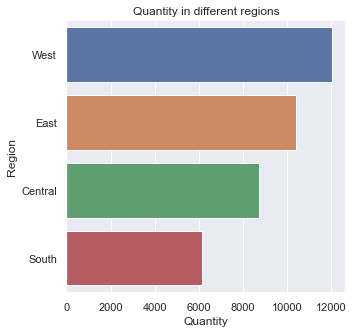

In [121]:
plt.figure(figsize=(5,5))
state=data1.groupby('Region').sum()
ss=state.sort_values(by=('Quantity'),ascending=False)
sns.barplot(x='Quantity',y=ss.index,data=ss)
plt.title("Quantity in different regions")

Quantity is maximum sold to the west customers and least to the south.

Text(0.5, 1.0, 'Discount in different regions')

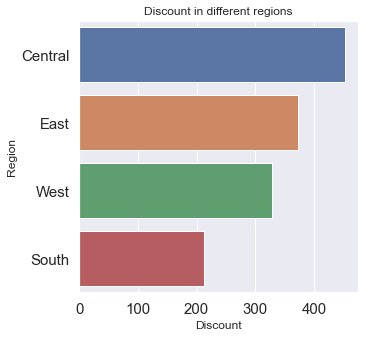

In [123]:
plt.figure(figsize=(5,5))
state=data1.groupby('Region').sum()
ss=state.sort_values(by=('Discount'),ascending=False)
sns.barplot(x='Discount',y=ss.index,data=ss)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("Discount in different regions")

Discount is maximum in the central and least in the south

Text(0.5, 1.0, 'Profit in different region')

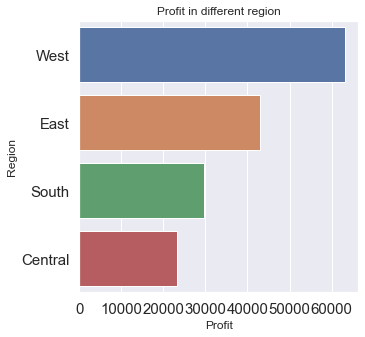

In [125]:
plt.figure(figsize=(5,5))
state=data1.groupby('Region').sum()
ss=state.sort_values(by=('Profit'),ascending=False)
sns.barplot(x='Profit',y=ss.index,data=ss)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("Profit in different region")

Profit is maximum in the west and least in the central.

# Category and Sub-Category

In [47]:
cat=data1.groupby(['Category']).sum()
cat

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,475954.3694,7887.5,350.54,24075.952525
Office Supplies,490816.2520,22567.0,778.00,81054.933450
Technology,421620.8010,6812.5,238.20,54033.098575


Furnitures make the highest profit.

In [48]:
s_cat=data1.groupby(['Sub-Category']).sum()
s_cat

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,126375.9780,2929.0,60.60,22199.769650
Appliances,74170.8530,1706.0,57.50,11070.482600
Art,26451.6380,2975.0,59.60,6333.141275
Binders,100842.7410,5889.0,419.50,11354.852975
Bookcases,71272.5549,855.5,44.79,1448.218775
Chairs,203016.5850,2299.5,104.00,10897.937900
Copiers,32780.9640,230.0,10.60,4710.635750
Envelopes,16370.6760,906.0,20.40,5799.756400
Fasteners,3024.2800,896.0,17.80,949.518200


Accessories have highest profit and tables make the negative profit.

Text(0.5, 1.0, 'Various Categories')

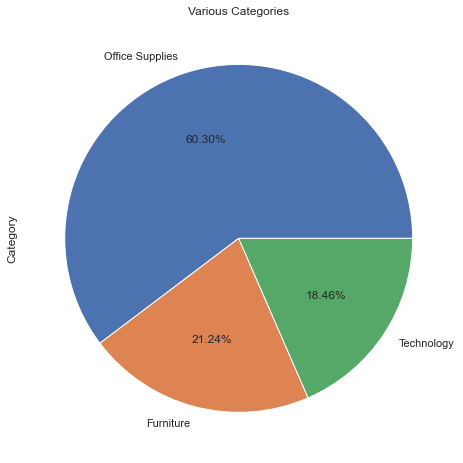

In [49]:
plt.figure(figsize=(10,8))
data1['Category'].value_counts().plot.pie(autopct="%.2f%%")
plt.title("Various Categories")

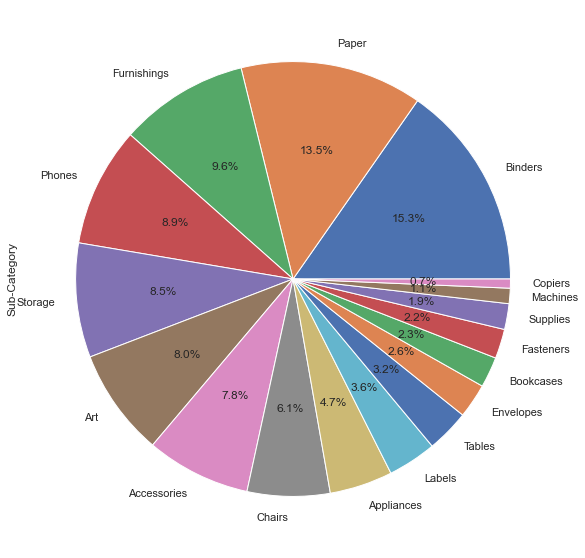

In [50]:
plt.figure(figsize=(12,10))
data1['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

# Analysis of sales,quantity,profit,discount with respect to ship mode and segment

<Figure size 720x576 with 0 Axes>

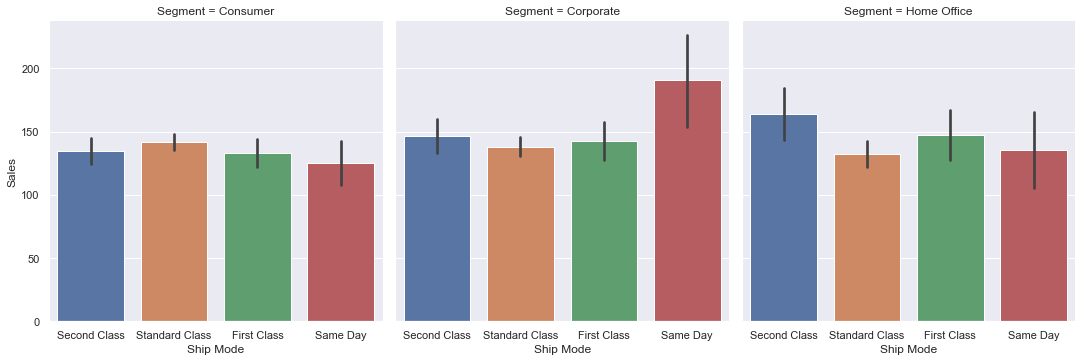

In [80]:
plt.figure(figsize=(10,8))
sns.catplot(x='Ship Mode',y='Sales',col='Segment',data=data1,kind='bar')

<Figure size 720x576 with 0 Axes>

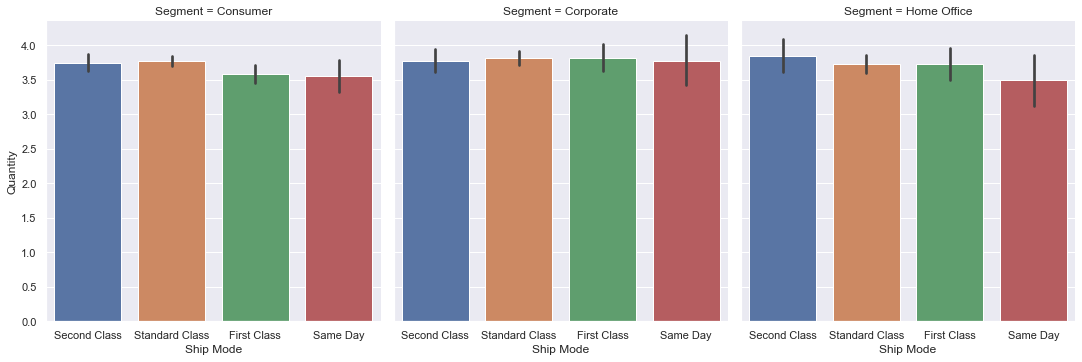

In [52]:
plt.figure(figsize=(10,8))
sns.catplot(x='Ship Mode',y='Quantity',col='Segment',data=data1,kind='bar')

Quabtity sold is overall the same through all the modes in each segment.

<Figure size 720x576 with 0 Axes>

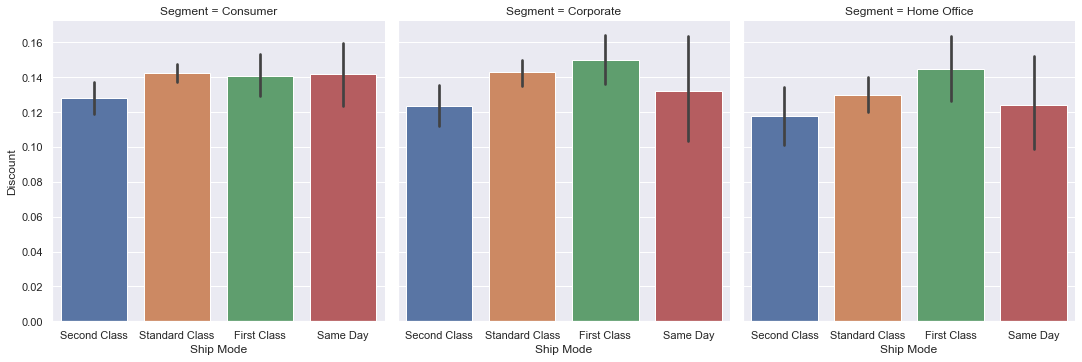

In [53]:
plt.figure(figsize=(10,8))
sns.catplot(x='Ship Mode',y='Discount',col='Segment',data=data1,kind='bar')

Discount is maximum for first class in each segmnet.

<Figure size 720x576 with 0 Axes>

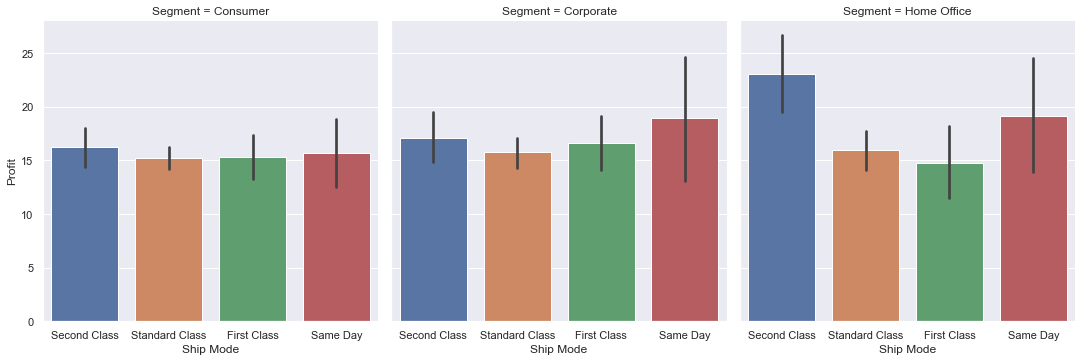

In [54]:
plt.figure(figsize=(10,8))
sns.catplot(x='Ship Mode',y='Profit',col='Segment',data=data1,kind='bar')

Profit is maximum for second class of ship mode in each segment.

# Analysis of sales,quantity,discount and profit with respect to Category and sub category


<Figure size 720x576 with 0 Axes>

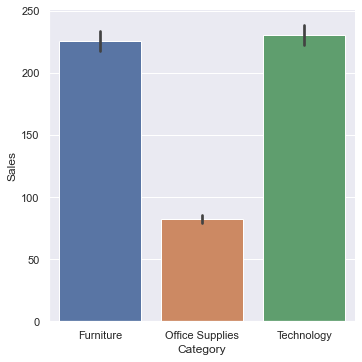

In [55]:
plt.figure(figsize=(10,8))
sns.catplot(x='Category',y='Sales',data=data1,kind='bar')

Sales is maximum for both Furniture and Technology

<Figure size 1440x576 with 0 Axes>

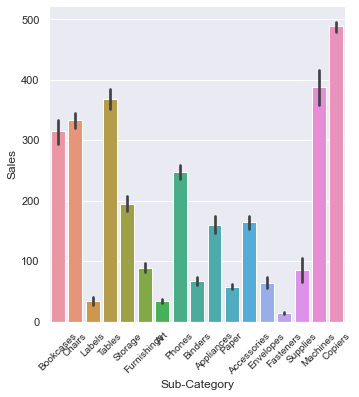

In [57]:
plt.figure(figsize=(20,8))
sns.catplot(x='Sub-Category',y='Sales',data=data1,kind='bar')
plt.xticks(size=10)
plt.xticks(rotation=45)
plt.show()

Sales is maximum for Copiers and minimum for Fasteners.

<Figure size 720x576 with 0 Axes>

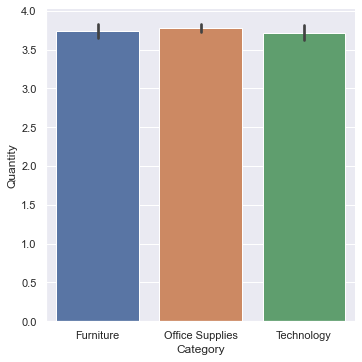

In [58]:
plt.figure(figsize=(10,8))
sns.catplot(x='Category',y='Quantity',data=data1,kind='bar')

Quantity sold is almost equal for all the categories.

<Figure size 1440x576 with 0 Axes>

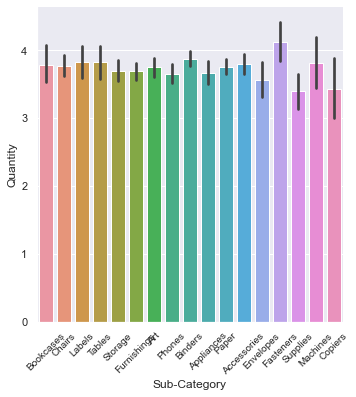

In [59]:
plt.figure(figsize=(20,8))
sns.catplot(x='Sub-Category',y='Quantity',data=data1,kind='bar')
plt.xticks(size=10)
plt.xticks(rotation=45)
plt.show()

Quantity is maximum for fasteners and least for supplies.

<Figure size 720x576 with 0 Axes>

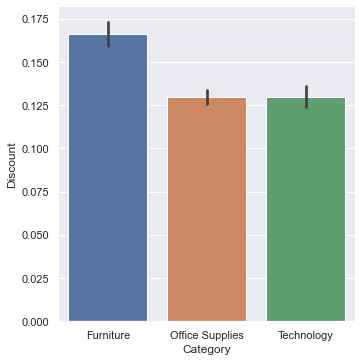

In [60]:
plt.figure(figsize=(10,8))
sns.catplot(x='Category',y='Discount',data=data1,kind='bar')

Discount is maximum in furniture.

<Figure size 1440x576 with 0 Axes>

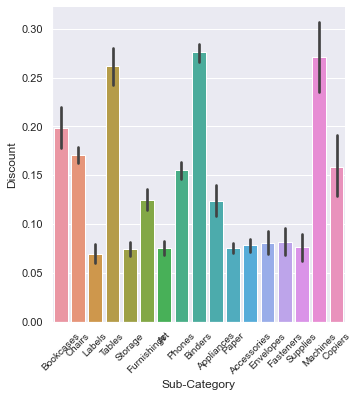

In [61]:
plt.figure(figsize=(20,8))
sns.catplot(x='Sub-Category',y='Discount',data=data1,kind='bar')
plt.xticks(size=10)
plt.xticks(rotation=45)
plt.show()

Discount is maximum in binders.

Discount is given maximum in Furniture.

<Figure size 720x576 with 0 Axes>

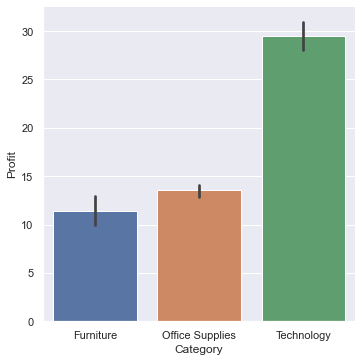

In [83]:
plt.figure(figsize=(10,8))
sns.catplot(x='Category',y='Profit',data=data1,kind='bar')


Technology yields maximum profit and least by Furniture.

Text(0.5, 1.0, 'Profit in different sub-categories')

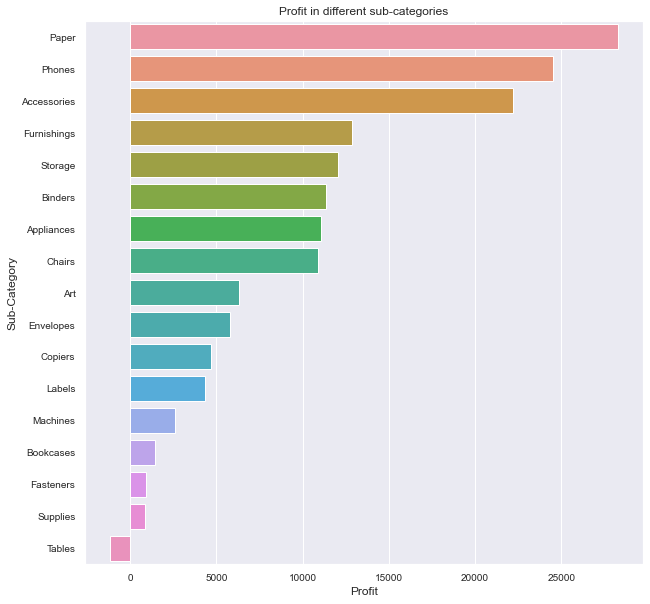

In [82]:
plt.figure(figsize=(10,10))
state=data1.groupby('Sub-Category').sum()
ss=state.sort_values(by=('Profit'),ascending=False)
sns.barplot(x='Profit',y=ss.index,data=ss)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title("Profit in different sub-categories")

In [ ]:
Papers have maximum profit.Tables have negative profit.

# Analysis of sales,quantity,discount,profit with respect to states

Text(0.5, 1.0, 'Sales in different states')

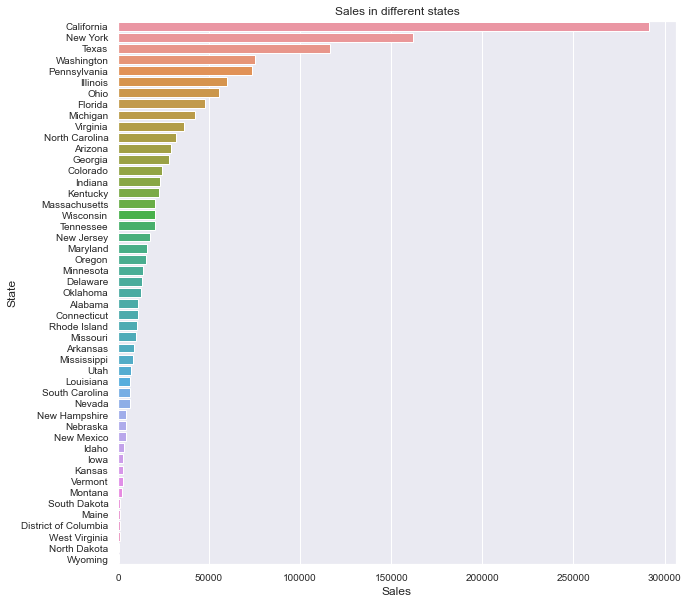

In [64]:
plt.figure(figsize=(10,10))
state=data1.groupby('State').sum()
ss=state.sort_values(by=('Sales'),ascending=False)
sns.barplot(x='Sales',y=ss.index,data=ss)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title("Sales in different states")


Sales is maximum in California and least in Wyoming

Text(0.5, 1.0, 'Quantity in different states')

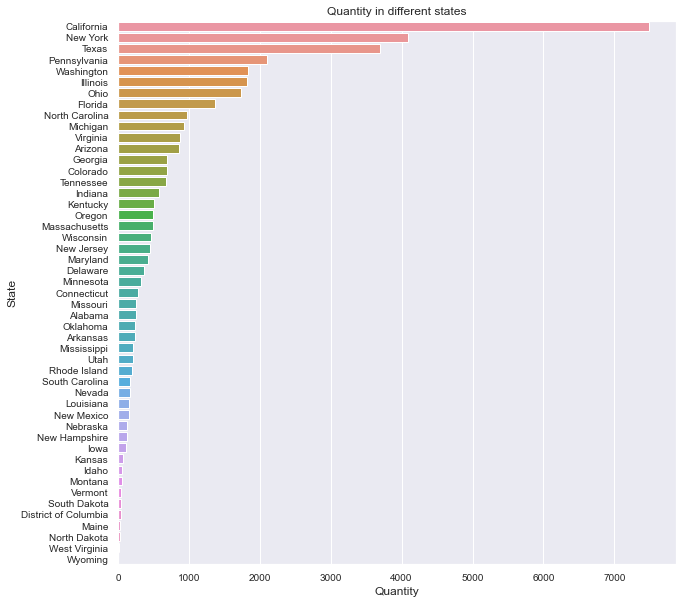

In [65]:
plt.figure(figsize=(10,10))
state=data1.groupby('State').sum()
ss=state.sort_values(by=('Quantity'),ascending=False)
sns.barplot(x='Quantity',y=ss.index,data=ss)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title("Quantity in different states")


Quantity sold is maximum in California and least in Wyoming.

Text(0.5, 1.0, 'Discount in different states')

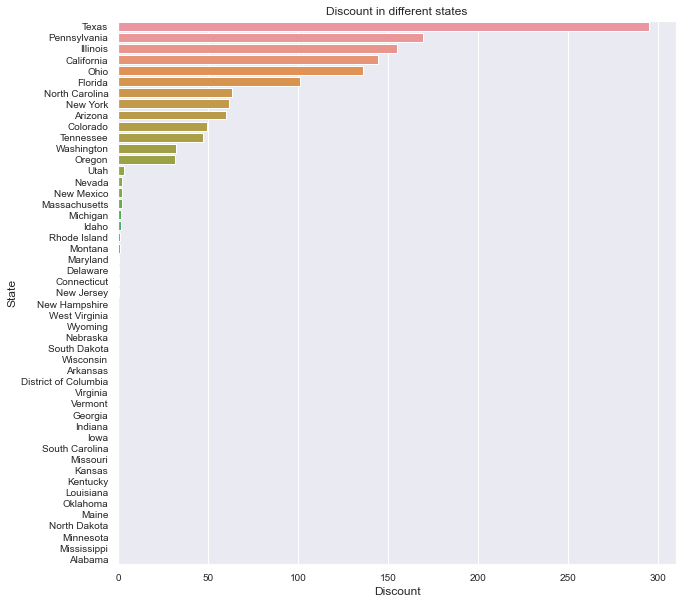

In [66]:
plt.figure(figsize=(10,10))
state=data1.groupby('State').sum()
ss=state.sort_values(by=('Discount'),ascending=False)
sns.barplot(x='Discount',y=ss.index,data=ss)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title("Discount in different states")

In [ ]:
Discount is maximum in Texas,Pennyslvania,Illinois.

Text(0.5, 1.0, 'Profit in different states')

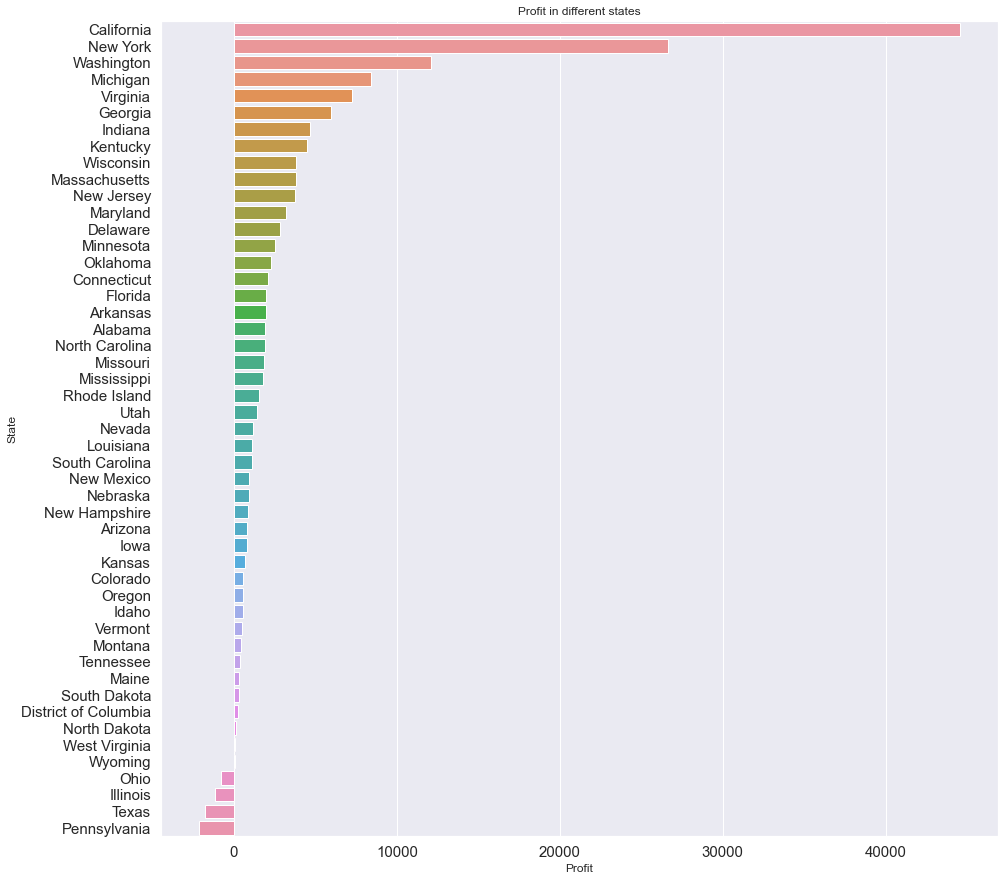

In [121]:
plt.figure(figsize=(15,15))
state=data1.groupby('State').sum()
ss=state.sort_values(by=('Profit'),ascending=False)
sns.barplot(x='Profit',y=ss.index,data=ss)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("Profit in different states")


California has highest sales and profit.New York and Washinton too has good profit.

Ohio,Illinois,Texas and Pennsylvania reports loss.Profit is extremely small for Maine,South Dakota,District of California,North
Dakota ,West Virginia and Wyoming.

In [68]:
s1=data1.groupby(['State','Sub-Category']).sum()
s2=s1.sort_values(by=["Profit","Sales","Discount"],ascending=False)

In [73]:
s2.loc['California'].sort_values(by=["Profit"],ascending=False)

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Paper,16335.1300,1048.5,0.00,6662.128875
Accessories,26568.2500,550.0,0.00,5552.375600
Binders,18506.6340,1032.0,54.80,4959.969775
Phones,44829.9760,680.5,34.20,4912.130450
Furnishings,18664.7700,745.0,0.00,4397.506375
Storage,33230.6000,622.0,0.00,4281.376950
Appliances,15181.9700,339.0,0.00,3326.288300
Chairs,41416.1900,463.5,26.00,2033.942950
Art,5442.6000,629.5,0.00,1548.940050


In [ ]:
In California maximum profit is accounted to the sale of paper and least to the sale of Fastener.

In [72]:
s2.loc['Pennsylvania'].sort_values(by=["Profit"],ascending=False)

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Paper,2290.176,219.0,12.2,715.299225
Accessories,5668.640,133.5,8.8,595.073475
Appliances,3238.050,77.0,4.6,409.500825
Envelopes,1234.064,67.0,3.6,370.302475
Furnishings,6725.544,225.0,12.8,334.822225
Copiers,1995.720,18.0,1.6,282.447125
Labels,598.304,104.0,4.6,201.420800
Art,1152.160,154.5,8.0,137.758100
Fasteners,154.712,69.5,2.8,29.322200


In [ ]:
In Pennyslvania loss is occured in supplies,Machines,Bookcases,Storage,Tables,chairs,Phones and Binders.

In [74]:
s2.loc['Texas'].sort_values(by=["Profit"],ascending=False)

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Phones,21227.6520,315.0,16.00,2419.804375
Paper,6904.4000,560.5,28.80,2155.993425
Accessories,9967.1260,281.0,16.20,1008.969825
Envelopes,2424.9220,105.0,6.00,672.432850
Copiers,2237.8120,16.0,1.00,354.084375
Art,2369.5280,259.0,14.20,316.353800
Labels,578.6720,93.5,5.80,198.677200
Fasteners,332.4640,105.5,4.80,80.735700
Supplies,1085.6180,65.0,3.80,-90.989225


In Texas loss is faced in sale of supplies,Machines,Storage,Bookcases,Tables,Cahirs,Appliances,Furnnishing,Binders.

In [75]:
s2.loc['Illinois'].sort_values(by=["Profit"],ascending=False)

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Paper,3455.816,242.5,12.0,1035.012825
Phones,9434.364,131.0,8.4,1026.693675
Accessories,5397.186,143.5,6.6,847.688925
Copiers,1995.720,14.0,0.8,283.267500
Machines,2205.706,12.0,1.5,174.362250
Art,930.032,144.5,7.4,138.954100
Envelopes,384.104,22.0,1.6,112.701875
Labels,224.872,48.0,2.6,77.462200
Fasteners,141.336,50.0,2.6,43.994900


In [ ]:
In Illinois loss is faced in the sale of MStorage,Bookcases,Tables,Cahirs,Appliances,Furnnishing,Binders.

In [76]:
s2.loc['Ohio'].sort_values(by=["Profit"],ascending=False)

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,6299.428,155.0,8.6,789.233575
Paper,2146.288,194.0,11.2,668.079075
Appliances,4198.710,96.0,4.6,474.080175
Furnishings,4054.850,179.5,9.2,439.390975
Copiers,1995.720,11.0,1.6,282.449625
Envelopes,562.000,38.0,2.4,194.605100
Art,840.104,140.0,7.8,103.237600
Fasteners,204.896,75.0,2.8,61.119700
Labels,161.840,43.0,2.6,55.522200


In Ohio loss is faced in sale of supplies,Machines,Storage,Bookcases,Tables,Chairs,Phone,Binders.

In [107]:
from sklearn import linear_model  
reg = linear_model.LinearRegression()  
reg.fit(data1[['Sales','Quantity','Discount']],data1.Profit) 



LinearRegression()

In [109]:
reg.coef_

array([ 7.34005930e-02,  1.17219448e+00, -9.52644676e+01])

So from here we see that profit is negatively associated discount, positively with sales and quantity.

Hence to increase profit store must work to reduce discount.
Thank you